In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('framingham.csv')
df = df.drop('cigsPerDay',axis=1)
df = df.drop('sysBP',axis=1)
df = df.drop('education',axis=1)
df = df.drop('diaBP',axis=1)

df.head()

,gender,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,23.10,85.0,85.0,0


In [40]:
df.isnull().sum()

gender               0
age                  0
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [41]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(df['totChol'].mode()[0])
df['BMI'] = df['BMI'].fillna(df['BMI'].mode()[0])
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mode()[0])
df['glucose'] = df['glucose'].fillna(df['glucose'].mode()[0])


<Axes: xlabel='age', ylabel='TenYearCHD'>

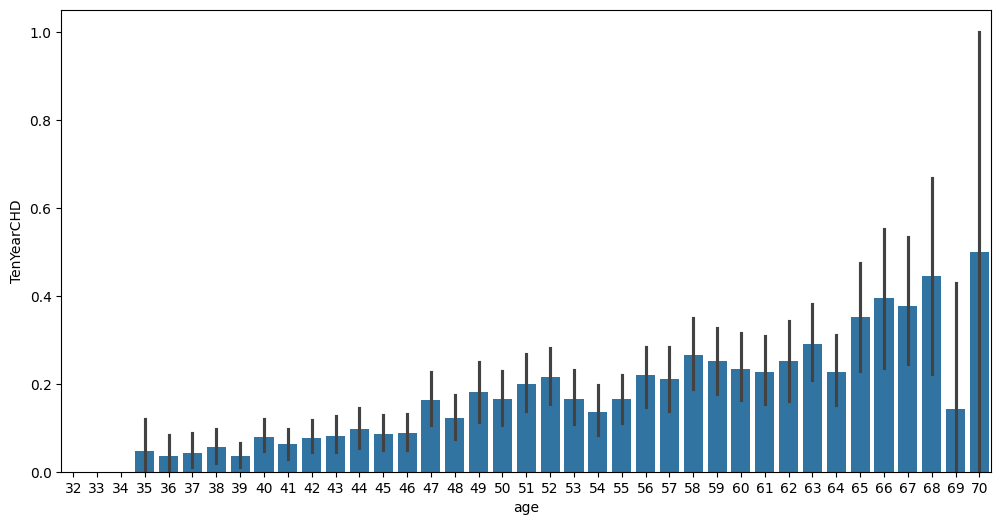

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='age',y='TenYearCHD',data=df)


In [43]:
X = df.iloc[:,:-1]
X
y = df.iloc[:,-1:]
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4235,0
4236,0


In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state= 42)

In [45]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,4,5,8,10,30,45],'max_iter':[100,200,300]}


In [47]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=10)
classifier_regressor.fit(X_train,y_train)

c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4, 5, 8, 10, 30, 45],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [48]:
# classifier_regressor.fit(X_train,y_train)
classifier_regressor.best_params_
y_pred = classifier_regressor.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       908
           1       0.68      0.09      0.15       152

    accuracy                           0.86      1060
   macro avg       0.78      0.54      0.54      1060
weighted avg       0.84      0.86      0.81      1060



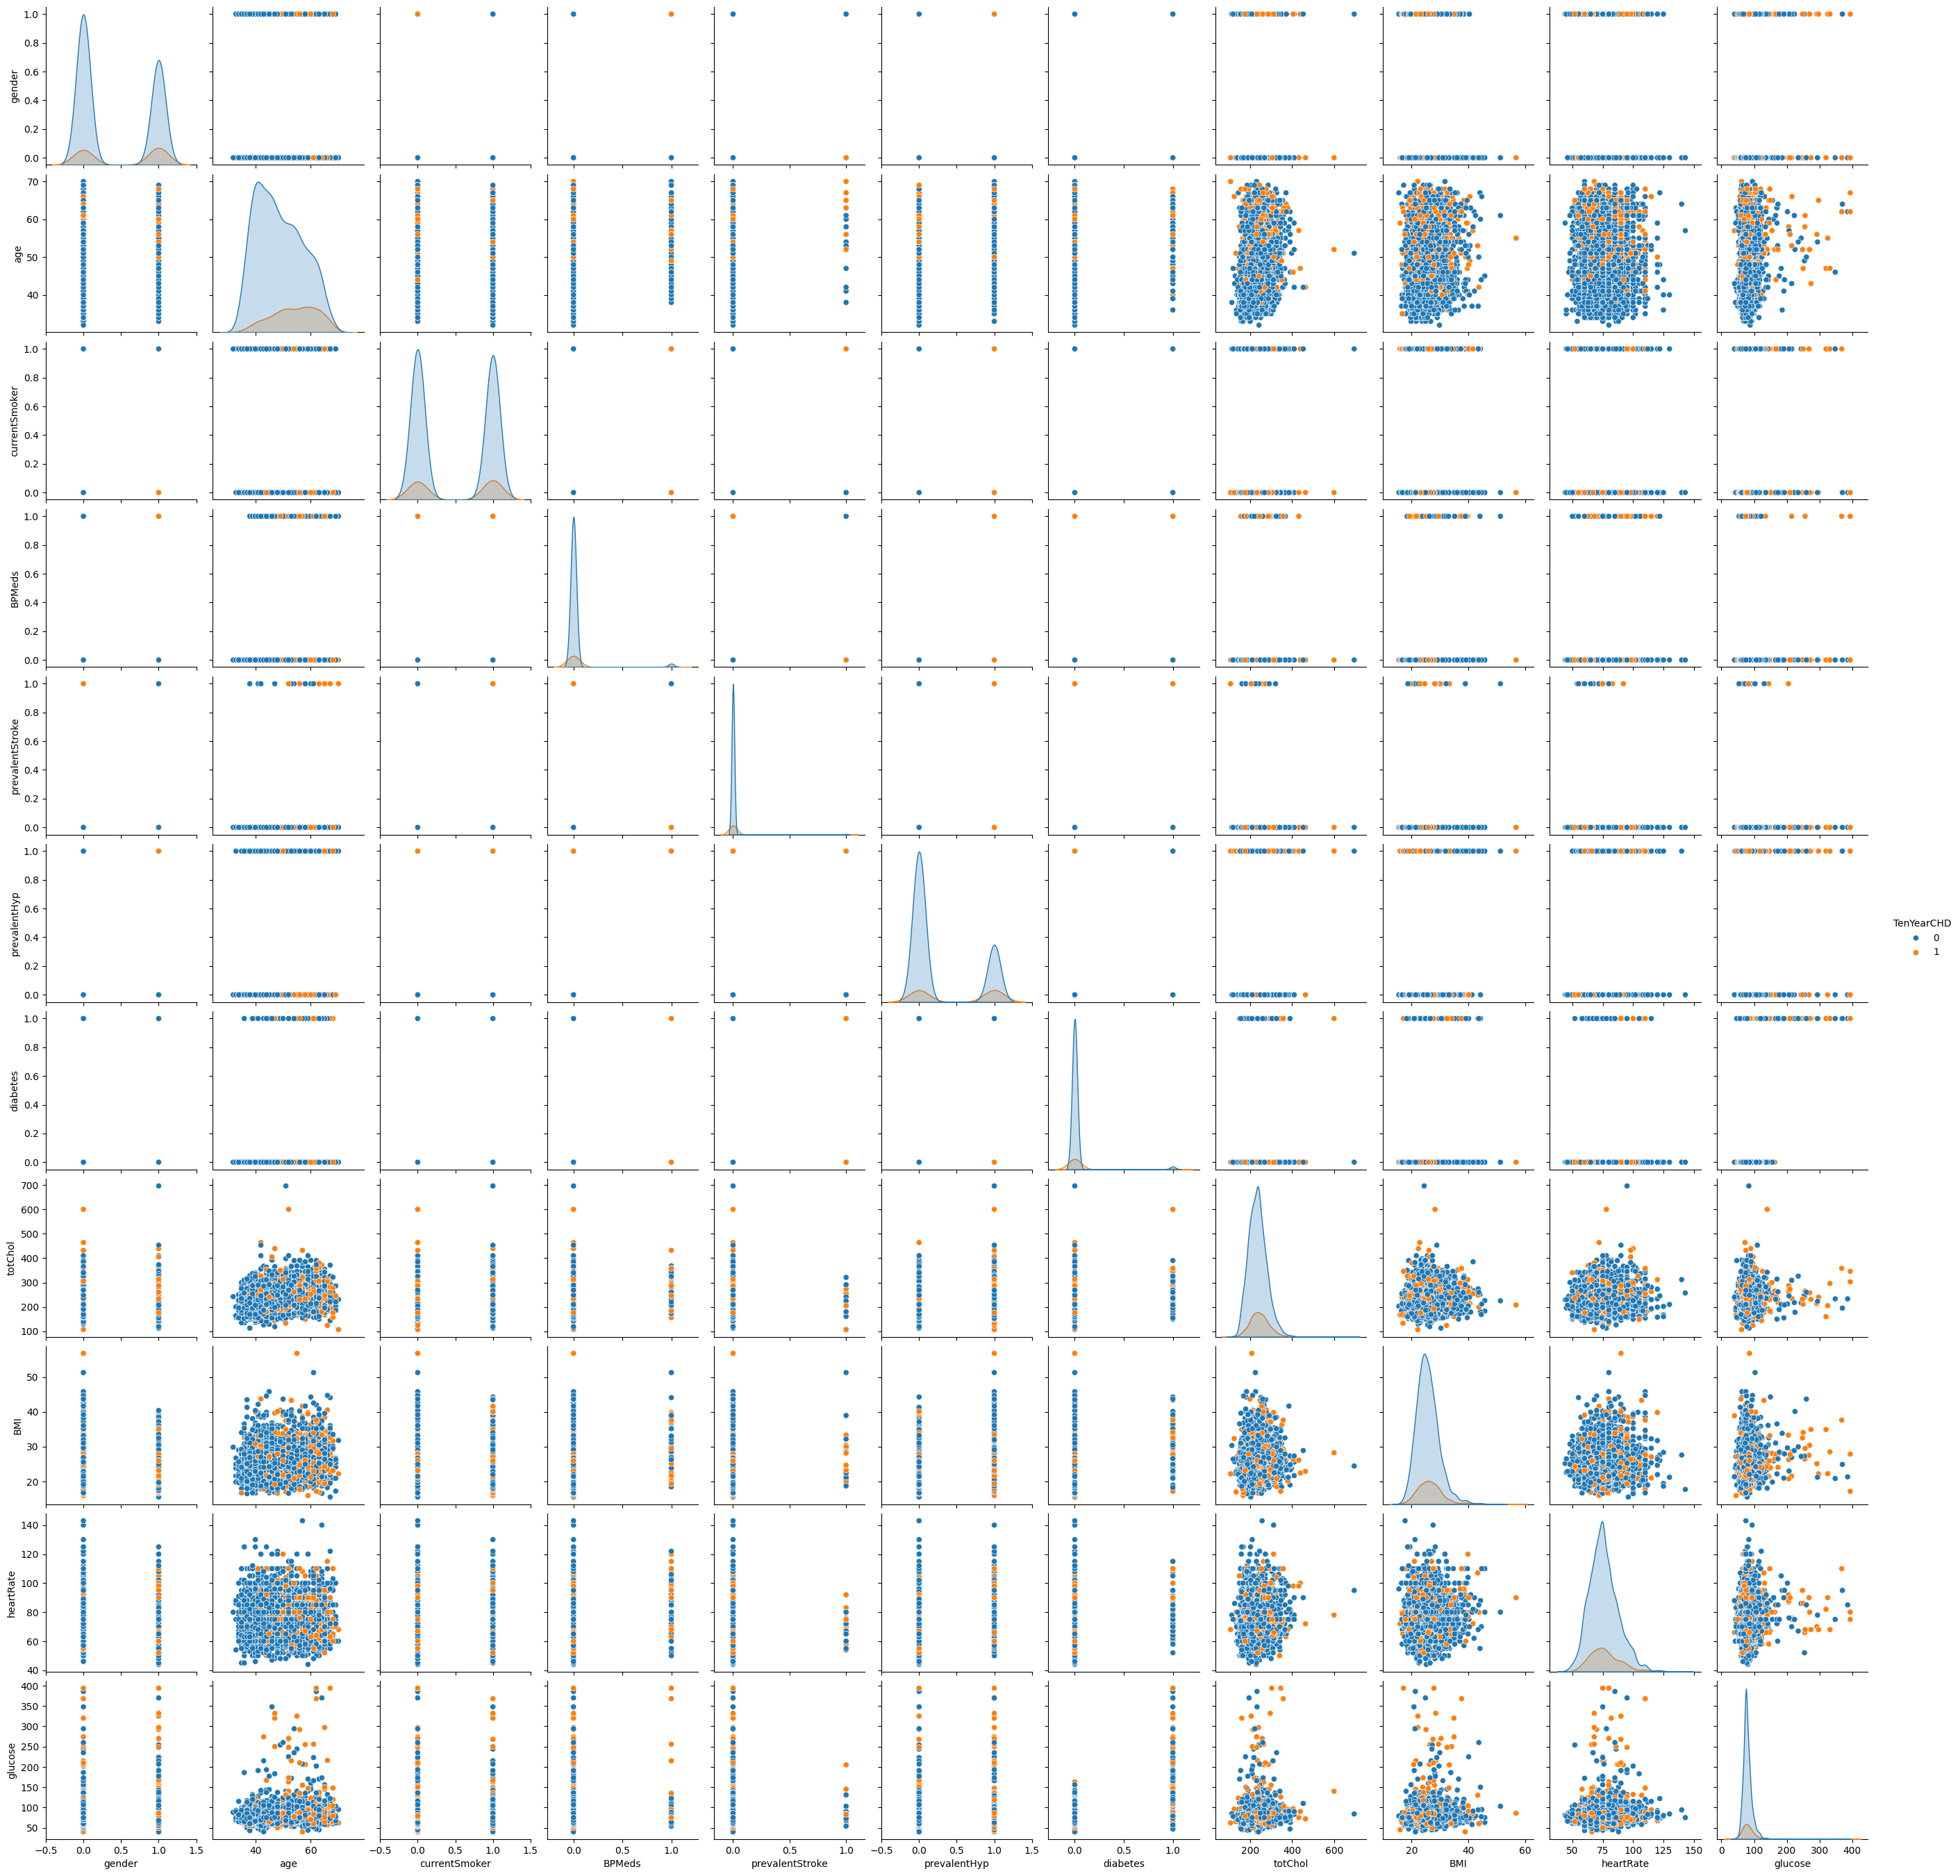

In [50]:
sns.pairplot(df,hue='TenYearCHD')

In [51]:
# sns.lineplot(x='age',y='TenYearCHD',data=df)
plt.figure(figsize=(15,12))
df.columns

Index(['gender', 'age', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

<Figure size 1500x1200 with 0 Axes>

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test,y_pred= y_pred)

array([[902,   6],
       [139,  13]], dtype=int64)

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)
print(y_resampled.value_counts())

X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test = train_test_split(X_resampled,y_resampled,test_size=0.25,random_state=42)

TenYearCHD
0             3594
1             3594
Name: count, dtype: int64


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression()
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,4,5,8,10,30,45],'max_iter':[100,200,300]}
classifier_regressor = GridSearchCV(classifier,param_grid= parameters,scoring='accuracy',cv=10)
classifier_regressor.fit(X_resampled_train,y_resampled_train)


c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4, 5, 8, 10, 30, 45],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [78]:
y_pred = classifier_regressor.predict(X_resampled_test)

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_true=y_resampled_test,y_pred=y_pred)
print(classification_report(y_true= y_resampled_test,y_pred= y_pred))
confusion_matrix(y_true= y_resampled_test,y_pred= y_pred)

from sklearn.metrics import f1_score,fbeta_score
f1_score(y_true= y_resampled_test,y_pred=y_pred)
# fbeta_score(y_true= y_resampled_test,y_pred=y_pred,beta=0.5)
df.columns
df.head()

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       915
           1       0.65      0.68      0.66       882

    accuracy                           0.66      1797
   macro avg       0.66      0.66      0.66      1797
weighted avg       0.66      0.66      0.66      1797



,gender,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,23.10,85.0,85.0,0


In [85]:
if classifier_regressor.predict([[0,23,0,0,0,0,1,250.68,25,87,88]]) == 0:
    print("low likelihood of Ten-Year Coronary Heart Disease risk")
else:
    print("Higher likelihood of Ten-Year Coronary Heart Disease risk")

low likelihood of Ten-Year Coronary Heart Disease risk


c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
